In [50]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
start='2012-01-01'
end='2022-08-31'
df=web.DataReader('AMZN','yahoo',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,8.974000,8.777500,8.794500,8.951500,102216000.0,8.951500
2012-01-04,9.025000,8.803500,8.960500,8.875500,84104000.0,8.875500
2012-01-05,8.912500,8.702500,8.797000,8.880500,76182000.0,8.880500
2012-01-06,9.232500,8.875000,8.903500,9.130500,140168000.0,9.130500
2012-01-09,9.218500,8.850000,9.138000,8.928000,101138000.0,8.928000
...,...,...,...,...,...,...
2022-08-25,137.419998,134.279999,135.259995,137.279999,37496300.0,137.279999
2022-08-26,137.830002,130.500000,136.550003,130.750000,53322700.0,130.750000
2022-08-29,131.949997,128.770004,129.899994,129.789993,48101600.0,129.789993


In [52]:
df=df.reset_index()

In [53]:
df.shape

(2684, 7)

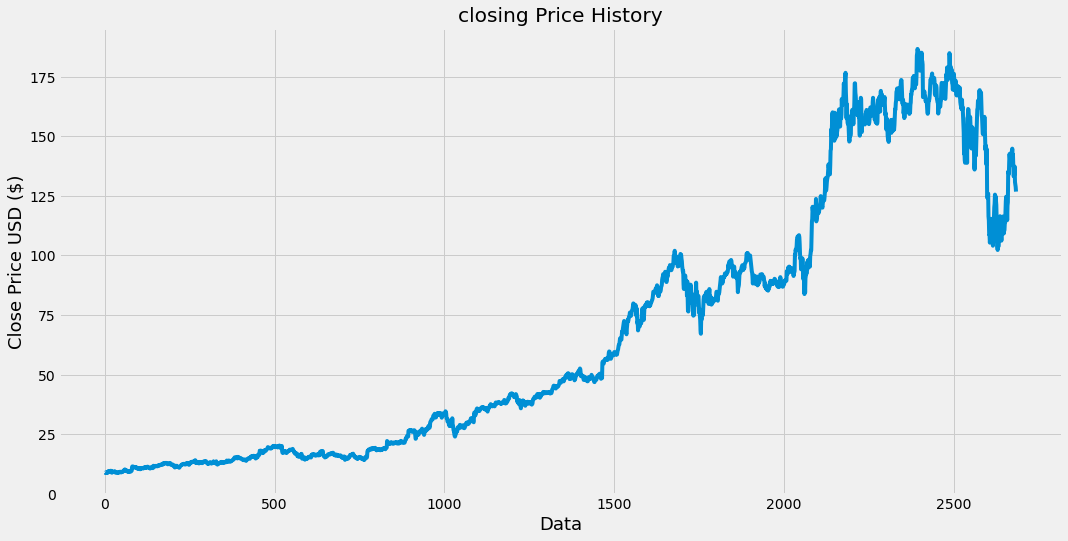

In [54]:
plt.figure(figsize=(16,8))
plt.title('closing Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

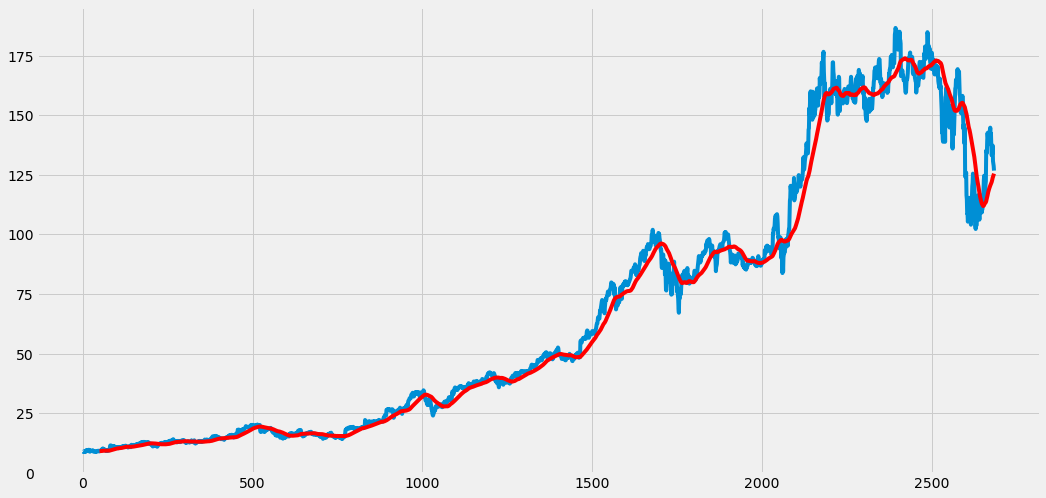

In [55]:
ma100=df.Close.rolling(50).mean()
plt.figure(figsize=(16,8))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [56]:
data=df[['Open']]
data

,Open
0,8.794500
1,8.960500
2,8.797000
3,8.903500
4,9.138000
...,...
2679,135.259995
2680,136.550003
2681,129.899994
2682,131.250000


In [57]:
train_data=pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
test_data=pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(train_data.shape)
print(test_data.shape)

(2147, 1)
(537, 1)


In [58]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaler.fit_transform(train_data)
scaled_train_data

array([[1.02510678e-03],
       [5.22471500e-04],
       [5.55540275e-04],
       ...,
       [9.68254683e-01],
       [9.61641079e-01],
       [9.36797076e-01]])

In [59]:
x_train=[]
y_train=[]
for i in range(100,scaled_train_data.shape[0]):
    x_train.append(scaled_train_data[i-100:i])
    y_train.append(scaled_train_data[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
    

In [60]:

x_train.shape

(2047, 100, 1)

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,activation='relu',input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60,return_sequences=True,activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(80,return_sequences=True,activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [63]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [64]:
model.fit(x_train,y_train,batch_size=20,epochs=200)

Epoch 1/200
103/103 [==============================] - 15s 103ms/step - loss: 0.0112
Epoch 2/200
103/103 [==============================] - 10s 102ms/step - loss: 0.0034
Epoch 3/200
103/103 [==============================] - 10s 101ms/step - loss: 0.0035
Epoch 4/200
103/103 [==============================] - 10s 101ms/step - loss: 0.0043
Epoch 5/200
103/103 [==============================] - 11s 103ms/step - loss: 0.0030
Epoch 6/200
103/103 [==============================] - 10s 102ms/step - loss: 0.0024
Epoch 7/200
103/103 [==============================] - 10s 102ms/step - loss: 0.0028
Epoch 8/200
103/103 [==============================] - 10s 101ms/step - loss: 0.0029
Epoch 9/200
103/103 [==============================] - 10s 101ms/step - loss: 0.0027
Epoch 10/200
103/103 [==============================] - 10s 101ms/step - loss: 0.0026
Epoch 11/200
103/103 [==============================] - 10s 101ms/step - loss: 0.0030
Epoch 12/200
103/103 [==============================] - 12s 115

103/103 [==============================] - 11s 108ms/step - loss: 0.0014
Epoch 97/200
103/103 [==============================] - 11s 107ms/step - loss: 0.0015
Epoch 98/200
103/103 [==============================] - 11s 105ms/step - loss: 0.0016
Epoch 99/200
103/103 [==============================] - 11s 103ms/step - loss: 0.0015
Epoch 100/200
103/103 [==============================] - 11s 103ms/step - loss: 0.0014
Epoch 101/200
103/103 [==============================] - 12s 113ms/step - loss: 0.0014
Epoch 102/200
103/103 [==============================] - 11s 105ms/step - loss: 0.0015
Epoch 103/200
103/103 [==============================] - 11s 104ms/step - loss: 0.0015
Epoch 104/200
103/103 [==============================] - 10s 100ms/step - loss: 0.0015
Epoch 105/200
103/103 [==============================] - 11s 111ms/step - loss: 0.0015
Epoch 106/200
103/103 [==============================] - 12s 112ms/step - loss: 0.0015
Epoch 107/200
103/103 [==============================] - 11s

103/103 [==============================] - 10s 100ms/step - loss: 0.0014
Epoch 191/200
103/103 [==============================] - 11s 104ms/step - loss: 0.0014
Epoch 192/200
103/103 [==============================] - 11s 103ms/step - loss: 0.0014
Epoch 193/200
103/103 [==============================] - 10s 102ms/step - loss: 0.0013
Epoch 194/200
103/103 [==============================] - 11s 103ms/step - loss: 0.0013
Epoch 195/200
103/103 [==============================] - 10s 99ms/step - loss: 0.0014
Epoch 196/200
103/103 [==============================] - 11s 109ms/step - loss: 0.0012
Epoch 197/200
103/103 [==============================] - 11s 107ms/step - loss: 0.0013
Epoch 198/200
103/103 [==============================] - 11s 103ms/step - loss: 0.0013
Epoch 199/200
103/103 [==============================] - 11s 104ms/step - loss: 0.0014
Epoch 200/200
103/103 [==============================] - 11s 106ms/step - loss: 0.0014


In [65]:
#model.save('keras_model.h5')

In [66]:
test_data.head()
    

,Close
2147,149.994995
2148,148.098495
2149,159.841995
2150,156.914505
2151,154.995499


In [67]:
past_100_days=train_data.tail(100)
past_100_days

,Close
2047,100.464500
2048,98.637001
2049,98.979500
2050,94.214996
2051,94.187500
...,...
2142,159.131500
2143,160.000000
2144,155.199997
2145,154.199997


In [68]:
final_df=past_100_days.append(test_data,ignore_index=True)

C:\Users\indra\AppData\Local\Temp\ipykernel_7224\2211534640.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(test_data,ignore_index=True)


In [69]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.16190386],
       [0.14411625],
       [0.1474499 ],
       [0.10107552],
       [0.10080789],
       [0.13497182],
       [0.11309133],
       [0.14562   ],
       [0.12041077],
       [0.10924663],
       [0.06034655],
       [0.10473531],
       [0.0702015 ],
       [0.        ],
       [0.05274968],
       [0.00610277],
       [0.0638651 ],
       [0.07464962],
       [0.0994355 ],
       [0.08248004],
       [0.11009349],
       [0.12823146],
       [0.10182502],
       [0.13572124],
       [0.10876484],
       [0.13983847],
       [0.1329132 ],
       [0.11246355],
       [0.11788009],
       [0.11192331],
       [0.15620989],
       [0.16302808],
       [0.17830937],
       [0.17819256],
       [0.23956589],
       [0.29526478],
       [0.30711997],
       [0.35603468],
       [0.33988226],
       [0.34893906],
       [0.31706737],
       [0.33428073],
       [0.35178126],
       [0.35702263],
       [0.34036895],
       [0.31023462],
       [0.33876777],
       [0.388

In [70]:
input_data.shape


(637, 1)

In [73]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [74]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(537, 100, 1)
(537,)


In [75]:
y_predicted=model.predict(x_test)


17/17 [==============================] - 1s 36ms/step


In [76]:
y_predicted.shape

(537, 1)

In [77]:
y_test

array([0.6439994 , 0.62554019, 0.73984328, 0.71134912, 0.69267084,
       0.63750246, 0.64838426, 0.67091689, 0.64420867, 0.66036599,
       0.66929626, 0.72419211, 0.69850108, 0.71161185, 0.74382908,
       0.75354783, 0.72554511, 0.71615251, 0.68330735, 0.7230047 ,
       0.72241093, 0.71608434, 0.73282074, 0.79612615, 0.77081474,
       0.7887678 , 0.78261141, 0.79367827, 0.81267274, 0.8590812 ,
       0.83871427, 0.83959023, 0.86351478, 0.88695248, 0.90268638,
       0.82314092, 0.7874295 , 0.7169701 , 0.77477127, 0.72926803,
       0.70060841, 0.69416004, 0.72003122, 0.68205667, 0.64829664,
       0.62210436, 0.62481022, 0.70682302, 0.64397995, 0.65367924,
       0.6903446 , 0.72875222, 0.71455623, 0.71642979, 0.75172773,
       0.70488129, 0.74099193, 0.6926952 , 0.73928367, 0.73678217,
       0.78355079, 0.85960681, 0.85994751, 0.82105319, 0.8088573 ,
       0.77676661, 0.74489009, 0.74965932, 0.73405195, 0.72989596,
       0.74352253, 0.74480737, 0.78339499, 0.72326758, 0.74673

In [78]:
y_predicted

array([[0.6479368 ],
       [0.6277966 ],
       [0.61156255],
       [0.6378447 ],
       [0.67017365],
       [0.6817484 ],
       [0.6709685 ],
       [0.65237826],
       [0.6394352 ],
       [0.6293801 ],
       [0.62832975],
       [0.6358646 ],
       [0.66478837],
       [0.6787439 ],
       [0.6855989 ],
       [0.6950825 ],
       [0.7047403 ],
       [0.7013109 ],
       [0.69146204],
       [0.67480373],
       [0.66982913],
       [0.6757808 ],
       [0.6838724 ],
       [0.695058  ],
       [0.72522783],
       [0.73821867],
       [0.74665797],
       [0.7448137 ],
       [0.7436867 ],
       [0.7490534 ],
       [0.7726846 ],
       [0.7859846 ],
       [0.79317605],
       [0.7997786 ],
       [0.8122021 ],
       [0.8266994 ],
       [0.82116246],
       [0.8039393 ],
       [0.7761664 ],
       [0.7541071 ],
       [0.73686504],
       [0.7207963 ],
       [0.7074272 ],
       [0.7063174 ],
       [0.69945896],
       [0.68336564],
       [0.6612673 ],
       [0.640

In [79]:
scaler.scale_

array([0.00973331])

In [80]:
scale_factor=1/0.0019036
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

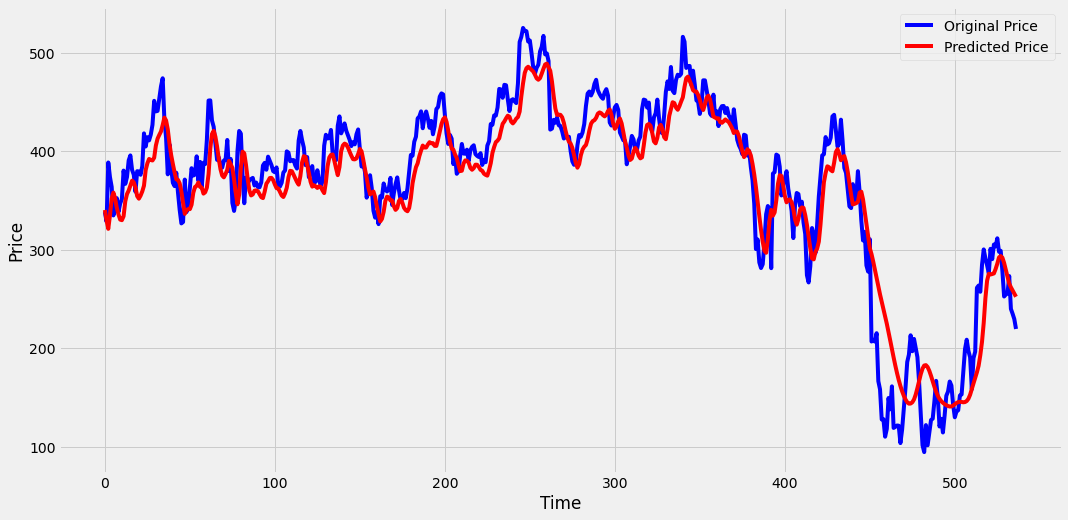

In [81]:
plt.figure(figsize=(16,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [82]:
forecast_features_set = []
labels = []
for i in range(60, 615):
    forecast_features_set.append(scaled_train_data[i-60:i, 0])
    labels.append(scaled_train_data[i, 0])

In [83]:
forecast_features_set , labels = np.array(forecast_features_set ), np.array(labels)

In [84]:
forecast_features_set = np.reshape(forecast_features_set, (forecast_features_set.shape[0], forecast_features_set.shape[1], 1))
forecast_features_set.shape

(555, 60, 1)

In [85]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,activation='relu',input_shape=(forecast_features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(60,return_sequences=True,activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(80,return_sequences=True,activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(forecast_features_set, labels, epochs = 200 , batch_size = 20)

Epoch 1/200
28/28 [==============================] - 6s 59ms/step - loss: 4.5174e-04
Epoch 2/200
28/28 [==============================] - 2s 62ms/step - loss: 2.5625e-04
Epoch 3/200
28/28 [==============================] - 2s 64ms/step - loss: 1.1420e-04
Epoch 4/200
28/28 [==============================] - 2s 59ms/step - loss: 9.0305e-05
Epoch 5/200
28/28 [==============================] - 2s 61ms/step - loss: 7.6950e-05
Epoch 6/200
28/28 [==============================] - 2s 59ms/step - loss: 6.9735e-05
Epoch 7/200
28/28 [==============================] - 2s 61ms/step - loss: 6.6822e-05
Epoch 8/200
28/28 [==============================] - 2s 62ms/step - loss: 7.5315e-05
Epoch 9/200
28/28 [==============================] - 2s 57ms/step - loss: 6.9175e-05
Epoch 10/200
28/28 [==============================] - 2s 57ms/step - loss: 6.8142e-05
Epoch 11/200
28/28 [==============================] - 2s 60ms/step - loss: 6.8858e-05
Epoch 12/200
28/28 [==============================] - 2s 62ms/s

28/28 [==============================] - 2s 59ms/step - loss: 3.9099e-05
Epoch 97/200
28/28 [==============================] - 2s 60ms/step - loss: 3.6081e-05
Epoch 98/200
28/28 [==============================] - 2s 61ms/step - loss: 3.2553e-05
Epoch 99/200
28/28 [==============================] - 2s 60ms/step - loss: 3.2333e-05
Epoch 100/200
28/28 [==============================] - 2s 60ms/step - loss: 3.4682e-05
Epoch 101/200
28/28 [==============================] - 2s 66ms/step - loss: 3.2200e-05
Epoch 102/200
28/28 [==============================] - 2s 59ms/step - loss: 3.1441e-05
Epoch 103/200
28/28 [==============================] - 2s 60ms/step - loss: 3.3873e-05
Epoch 104/200
28/28 [==============================] - 2s 60ms/step - loss: 3.1921e-05
Epoch 105/200
28/28 [==============================] - 2s 60ms/step - loss: 3.3744e-05
Epoch 106/200
28/28 [==============================] - 2s 60ms/step - loss: 3.1536e-05
Epoch 107/200
28/28 [==============================] - 2s 60

28/28 [==============================] - 2s 60ms/step - loss: 3.1445e-05
Epoch 191/200
28/28 [==============================] - 2s 60ms/step - loss: 2.7306e-05
Epoch 192/200
28/28 [==============================] - 2s 61ms/step - loss: 3.0651e-05
Epoch 193/200
28/28 [==============================] - 2s 60ms/step - loss: 2.6886e-05
Epoch 194/200
28/28 [==============================] - 2s 60ms/step - loss: 2.7833e-05
Epoch 195/200
28/28 [==============================] - 2s 60ms/step - loss: 2.4921e-05
Epoch 196/200
28/28 [==============================] - 2s 63ms/step - loss: 2.3660e-05
Epoch 197/200
28/28 [==============================] - 2s 62ms/step - loss: 2.9971e-05
Epoch 198/200
28/28 [==============================] - 2s 61ms/step - loss: 3.4515e-05
Epoch 199/200
28/28 [==============================] - 2s 61ms/step - loss: 2.4500e-05
Epoch 200/200
28/28 [==============================] - 2s 60ms/step - loss: 2.3125e-05


In [86]:
forecast_list=[]

batch=scaled_train_data[-forecast_features_set.shape[1]:].reshape((1,forecast_features_set.shape[1],1))

for i in range(forecast_features_set.shape[1]):
    forecast_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:], [[forecast_list[i]]], axis=1)

1/1 [==============================] - 0s 24ms/step


In [87]:
df_predict=pd.DataFrame(scaler.inverse_transform(forecast_list),index=df[-forecast_features_set.shape[1]:].index, 
                        columns=["prediction"])

df_predict =pd.concat([df,df_predict],axis=1)
df_predict.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,prediction
2679,2022-08-25,137.419998,134.279999,135.259995,137.279999,37496300.0,137.279999,87.894821
2680,2022-08-26,137.830002,130.500000,136.550003,130.750000,53322700.0,130.750000,87.902734
2681,2022-08-29,131.949997,128.770004,129.899994,129.789993,48101600.0,129.789993,87.917384
2682,2022-08-30,132.070007,126.849998,131.250000,128.729996,49203000.0,128.729996,87.934022
2683,2022-08-31,130.589996,126.739998,129.449997,126.769997,53648700.0,126.769997,87.950174


In [88]:
from pandas.tseries.offsets import DateOffset
add_dates=[str(df.index[-1]) + str(DateOffset(days=x)) for x in range(0,300)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [89]:
#future_dates.tail(20)

In [90]:
df_forecast=pd.DataFrame(scaler.inverse_transform(forecast_list),index=future_dates[-forecast_features_set.shape[1]:].index, 
                        columns=["prediction"])

df_forecast =pd.concat([df,df_forecast],axis=1)

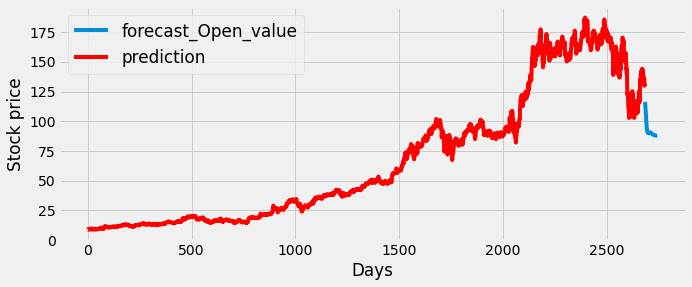

In [92]:
plt.figure(figsize=(10,4))
plt.plot(np.array(df_forecast["prediction"]),label="forecast_Open_value")
plt.plot(np.array(df_predict["Open"]),color="r",label="prediction")
plt.legend(loc='best',fontsize='large')
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.show()